In [1]:
import matplotlib.pyplot as plt
import numpy as np
from api.smithwilson import RiskFreeRates

In [2]:
rates = np.array([0.03405, 0.03164, 0.02914, 0.02753])
maturities = np.array([2, 3, 5, 10])
projection = np.arange(1, 151)
ufr = 0.0345
alpha0 = 0.397593
convergence_maturity = 20
tol = 1e-4

In [3]:
RFR = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol)

In [4]:
alpha, r = RFR.result

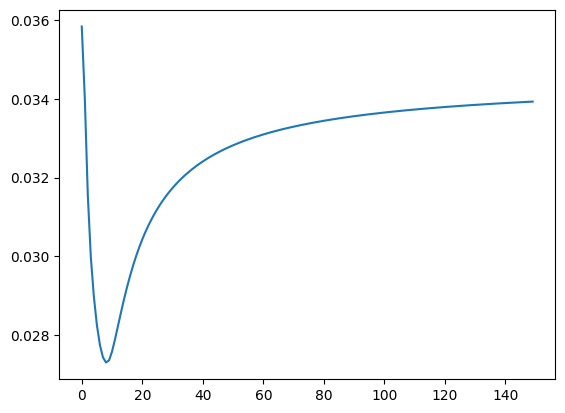

In [5]:
plt.plot(r)

In [7]:
eiopa = np.genfromtxt('../Data/SE_31_3_2023_SWP_LLP_10_EXT_10_UFR_345.csv')

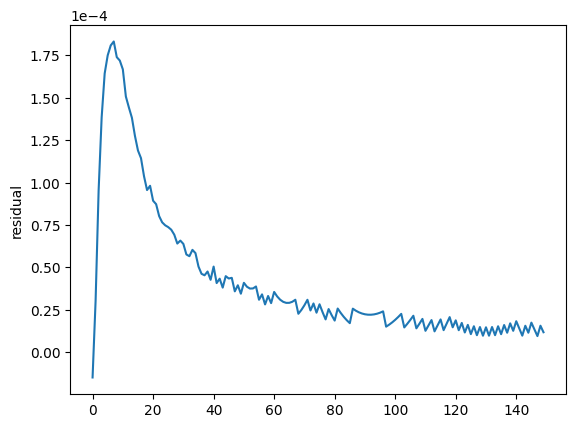

In [8]:
plt.plot(eiopa-r)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.ylabel('residual')
plt.show()

In [26]:
mse = (np.square(eiopa - r)).mean()

In [27]:
print(f'MSE: {mse}, alpha: {alpha}')

MSE: 3.5306050096900914e-09, alpha: 0.39922635774331505


In [28]:
RFR_alpha = RiskFreeRates(rates, maturities, projection, ufr, convergence_maturity, tol, alpha0)

In [29]:
alpha2, r2 = RFR_alpha.result

In [30]:
mse2 = (np.square(eiopa - r2)).mean()

In [31]:
print(f'MSE: {mse2}, alpha: {alpha2}')

MSE: 3.6503553010239784e-09, alpha: 0.397593


In [32]:
f_19 = (1 + r[19])**20/(1 + r[18])**19 - 1
f_19

0.03437285429802017

In [33]:
r[19]

0.030231832182329166

In [34]:
f_20 = (1 + r[20])**21/(1 + r[19])**20 - 1

In [35]:
ufr - f_20

8.528724262471532e-05

In [36]:
(ufr - f_20) / 1e-4

0.8528724262471532